# Traffic Easing Dataset Analysis
- speed bumps
- speed limit

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import geopandas as gpd
from shapely.geometry import Point, LineString
from shapely import wkt
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiPoint
pd.set_option('display.max_columns', 500)

## Speed Bumps

In [75]:
speed_bump = pd.read_csv('./crash_matched_data/speed_bumps_matched.csv')

In [76]:
speed_bump.head()

date_date_    time_date_   from_stree  new_humps on_street  shape_leng  \
0  2014-05-22  00:00:00.000     6 AVENUE        2.0  1 STREET  775.659477   
1  2014-05-22  00:00:00.000     6 AVENUE        2.0  1 STREET  775.659477   
2  2017-09-11  00:00:00.000  HOYT STREET        2.0  1 STREET  652.672074   
3  2017-09-11  00:00:00.000  HOYT STREET        2.0  1 STREET  652.672074   
4  2017-09-11  00:00:00.000  HOYT STREET        2.0  1 STREET  652.672074   

     to_street                                           geometry  \
0     7 AVENUE  MULTIPOINT (-73.9799168591299 40.6728580233743...   
1     7 AVENUE  MULTIPOINT (-73.9799168591299 40.6728580233743...   
2  BOND STREET  MULTIPOINT (-73.99294800158468 40.678995874101...   
3  BOND STREET  MULTIPOINT (-73.99294800158468 40.678995874101...   
4  BOND STREET  MULTIPOINT (-73.99294800158468 40.678995874101...   

   index_right  Unnamed: 0 Roadway.Name            From         To  \
0        126.0       148.0     3 AVENUE       29 STREET  30 STREET   
1        129.0       151.0     3 AVENUE  EAST 60 STREET  61 STREET   
2        126.0       148.0     3 AVENUE       29 STREET  30 STREET   
3        188.0       225.0     5 AVENUE       30 STREET  31 STREET   
4        129.0       151.0     3 AVENUE  EAST 60 STREET  61 STREET   

                          int1                    int2   zip1     zip2  \
0       3+AVENUE+%26+29+STREET  3+AVENUE+%26+30+STREET  11232  10016.0   
1  3+AVENUE+%26+EAST+60+STREET  3+AVENUE+%26+61+STREET  10022  11220.0   
2       3+AVENUE+%26+29+STREET  3+AVENUE+%26+30+STREET  11232  10016.0   
3       5+AVENUE+%26+30+STREET  5+AVENUE+%26+31+STREET  11232  10001.0   
4  3+AVENUE+%26+EAST+60+STREET  3+AVENUE+%26+61+STREET  10022  11220.0   

                    ll1                   ll2       lat1      long1  \
0  40.659353,-74.002185  40.743208,-73.979949  40.659353 -74.002185   
1  40.762168,-73.966129  40.641597,-74.021248  40.762168 -73.966129   
2  40.659353,-74.002185  40.743208,-73.979949  40.659353 -74.002185   
3  40.656320,-73.998669  40.746539,-73.985973  40.656320 -73.998669   
4  40.762168,-73.966129  40.641597,-74.021248  40.762168 -73.966129   

        lat2      long2    top_lat  right_long    bot_lat  left_long  \
0  40.743208 -73.979949  40.743208  -73.979949  40.659353 -74.002185   
1  40.641597 -74.021248  40.762168  -73.966129  40.641597 -74.021248   
2  40.743208 -73.979949  40.743208  -73.979949  40.659353 -74.002185   
3  40.746539 -73.985973  40.746539  -73.985973  40.656320 -73.998669   
4  40.641597 -74.021248  40.762168  -73.966129  40.641597 -74.021248   

   botright_lat  botright_long  botleft_lat  botleft_long  topright_lat  \
0     40.659223     -73.979819    40.659223    -74.002315     40.743338   
1     40.641467     -73.965999    40.641467    -74.021378     40.762298   
2     40.659223     -73.979819    40.659223    -74.002315     40.743338   
3     40.656190     -73.985843    40.656190    -73.998799     40.746669   
4     40.641467     -73.965999    40.641467    -74.021378     40.762298   

   topright_long  topleft_lat  topleft_long  streetID  
0     -73.979819    40.743338    -74.002315     148.0  
1     -73.965999    40.762298    -74.021378     151.0  
2     -73.979819    40.743338    -74.002315     148.0  
3     -73.985843    40.746669    -73.998799     225.0  
4     -73.965999    40.762298    -74.021378     151.0

In [80]:
speed_bump.time_date_.value_counts()

00:00:00.000    4384
Name: time_date_, dtype: int64

In [83]:
bump_loc = speed_bump[["date_date_", "from_stree", "new_humps", "geometry", "lat1", "long1", "Roadway.Name"]].dropna()

In [84]:
#map coordinates 
map = folium.Map(location=[bump_loc.lat1.mean(), 
                           bump_loc.long1.mean()], zoom_start=14, control_scale=True)

for index, location_info in bump_loc.iterrows(): 
    folium.Marker([location_info["lat1"], location_info["long1"]], popup=location_info["Roadway.Name"]).add_to(map)

In [147]:
#map

In [138]:
bump_loc.head()

date_date_   from_stree  new_humps  \
0  2014-05-22     6 AVENUE        2.0   
1  2014-05-22     6 AVENUE        2.0   
2  2017-09-11  HOYT STREET        2.0   
3  2017-09-11  HOYT STREET        2.0   
4  2017-09-11  HOYT STREET        2.0   

                                            geometry       lat1      long1  \
0  MULTIPOINT (-73.9799168591299 40.6728580233743...  40.659353 -74.002185   
1  MULTIPOINT (-73.9799168591299 40.6728580233743...  40.762168 -73.966129   
2  MULTIPOINT (-73.99294800158468 40.678995874101...  40.659353 -74.002185   
3  MULTIPOINT (-73.99294800158468 40.678995874101...  40.656320 -73.998669   
4  MULTIPOINT (-73.99294800158468 40.678995874101...  40.762168 -73.966129   

  Roadway.Name  
0     3 AVENUE  
1     3 AVENUE  
2     3 AVENUE  
3     5 AVENUE  
4     3 AVENUE

In [139]:
bump_loc['geometry'] = bump_loc['geometry'].astype(str).apply(wkt.loads)
bump_loc = gpd.GeoDataFrame(bump_loc, geometry = 'geometry')        

/var/folders/ks/gjt8vnfs62sc_5gmd7sdvxph0000gn/T/ipykernel_57138/4240534188.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


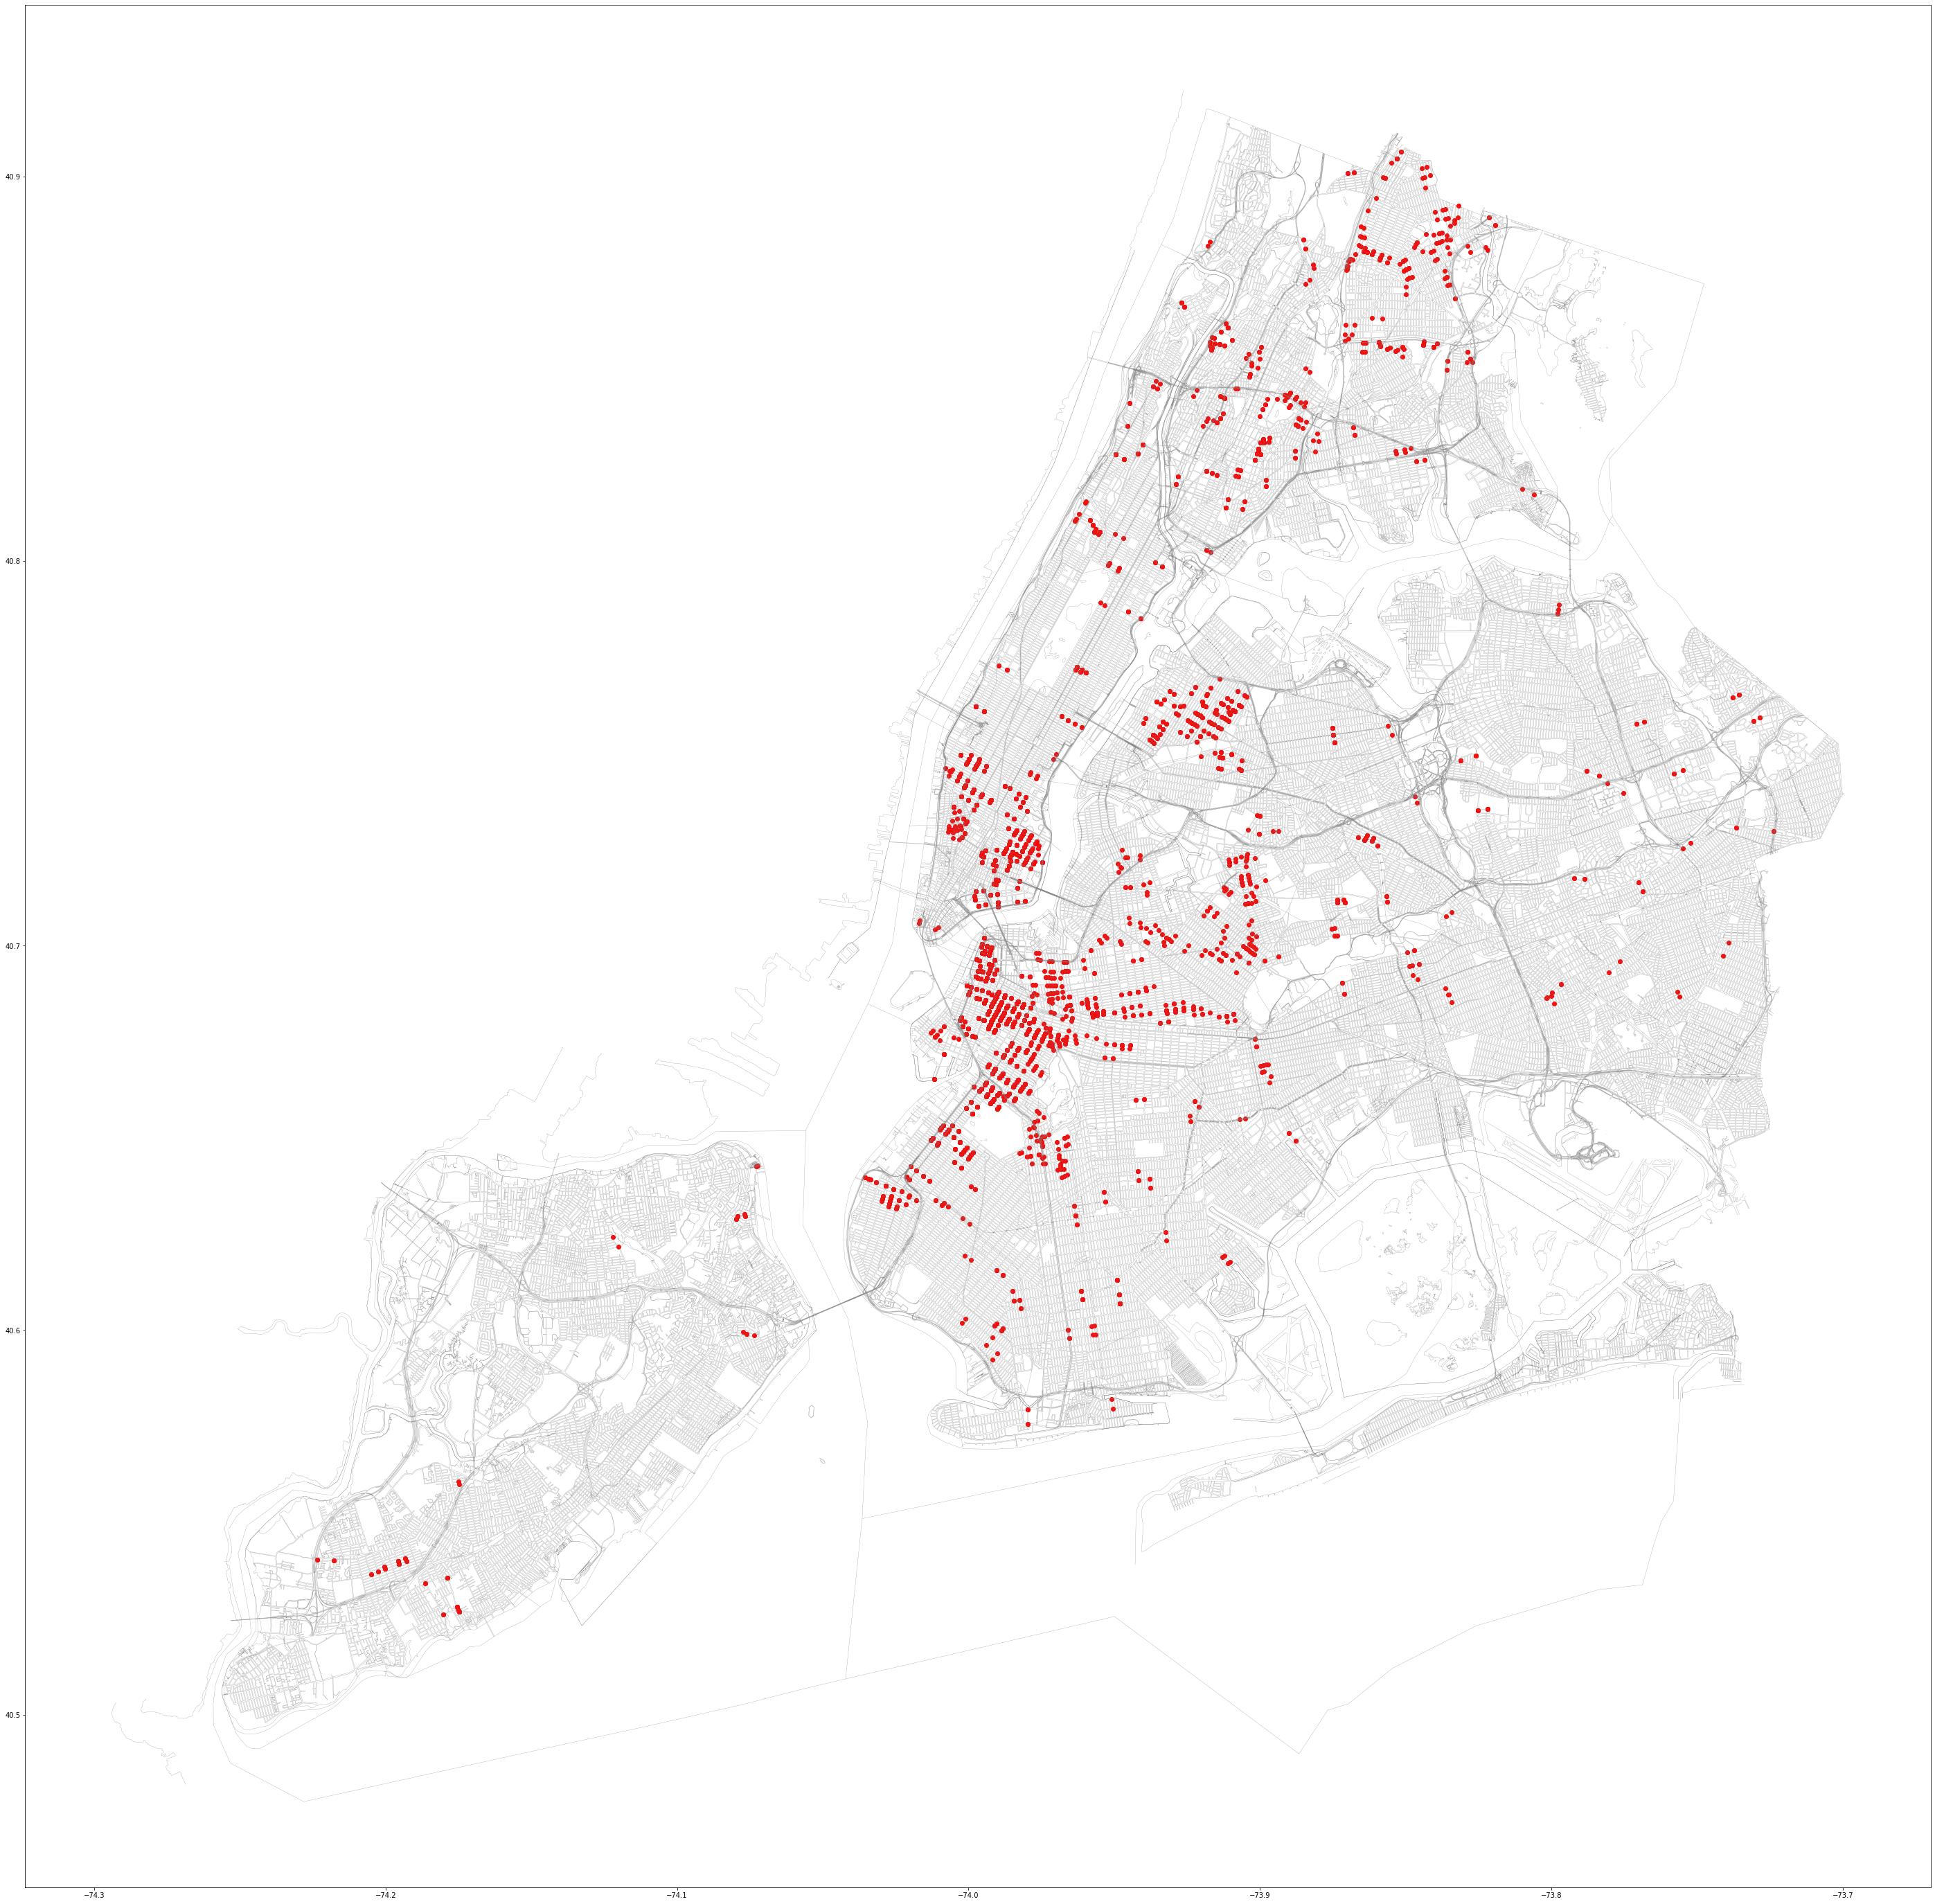

In [151]:
fig, ax = plt.subplots(figsize = (50, 50))
bump_loc = bump_loc.set_crs(4326, allow_override = True)
street.to_crs(bump_loc.crs).plot(ax=ax, figsize = (50, 50), color = 'grey', linewidth = 0.25)
bump_loc.plot(ax=ax, figsize = (50, 50), color='red')
fig.show()

# Speed Limits

In [133]:
speed_limits = pd.read_csv('./crash_matched_data/speed_limits_matched.csv')
street = gpd.GeoDataFrame.from_file('./DCM_20220930shp/DCM.shp')

/var/folders/ks/gjt8vnfs62sc_5gmd7sdvxph0000gn/T/ipykernel_57138/4234311209.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  speed_limits = pd.read_csv('./crash_matched_data/speed_limits_matched.csv')


In [134]:
#create new df for mapping with required cols
speed_limits = speed_limits[['postvz_sg', 'postvz_sl', 'street', 'shape_leng', 'geometry', 'streetID']].dropna()
speed_limits['geometry'] = speed_limits['geometry'].astype(str).apply(wkt.loads)
speed_limits = gpd.GeoDataFrame(speed_limits, geometry = 'geometry')                    

In [135]:
speed_limits.head()

postvz_sg  postvz_sl                      street  shape_leng  \
12        NO       25.0               TRAVIS AVENUE  637.659701   
13        NO       25.0               TRAVIS AVENUE  637.659701   
16        NO       25.0  EAST MOSHOLU PARKWAY SOUTH  350.205319   
17        NO       25.0  EAST MOSHOLU PARKWAY SOUTH  350.205319   
24        NO       25.0            EVERGREEN AVENUE  242.154925   

                                             geometry  streetID  
12  MULTIPOINT (-74.16562 40.59362, -74.16778 40.5...    2189.0  
13  MULTIPOINT (-74.16562 40.59362, -74.16778 40.5...    2188.0  
16  MULTIPOINT (-73.88340 40.87395, -73.88296 40.8...     971.0  
17  MULTIPOINT (-73.88340 40.87395, -73.88296 40.8...    1721.0  
24  MULTIPOINT (-73.93423 40.70330, -73.93395 40.7...    1181.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/var/folders/ks/gjt8vnfs62sc_5gmd7sdvxph0000gn/T/ipykernel_57138/2579416620.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


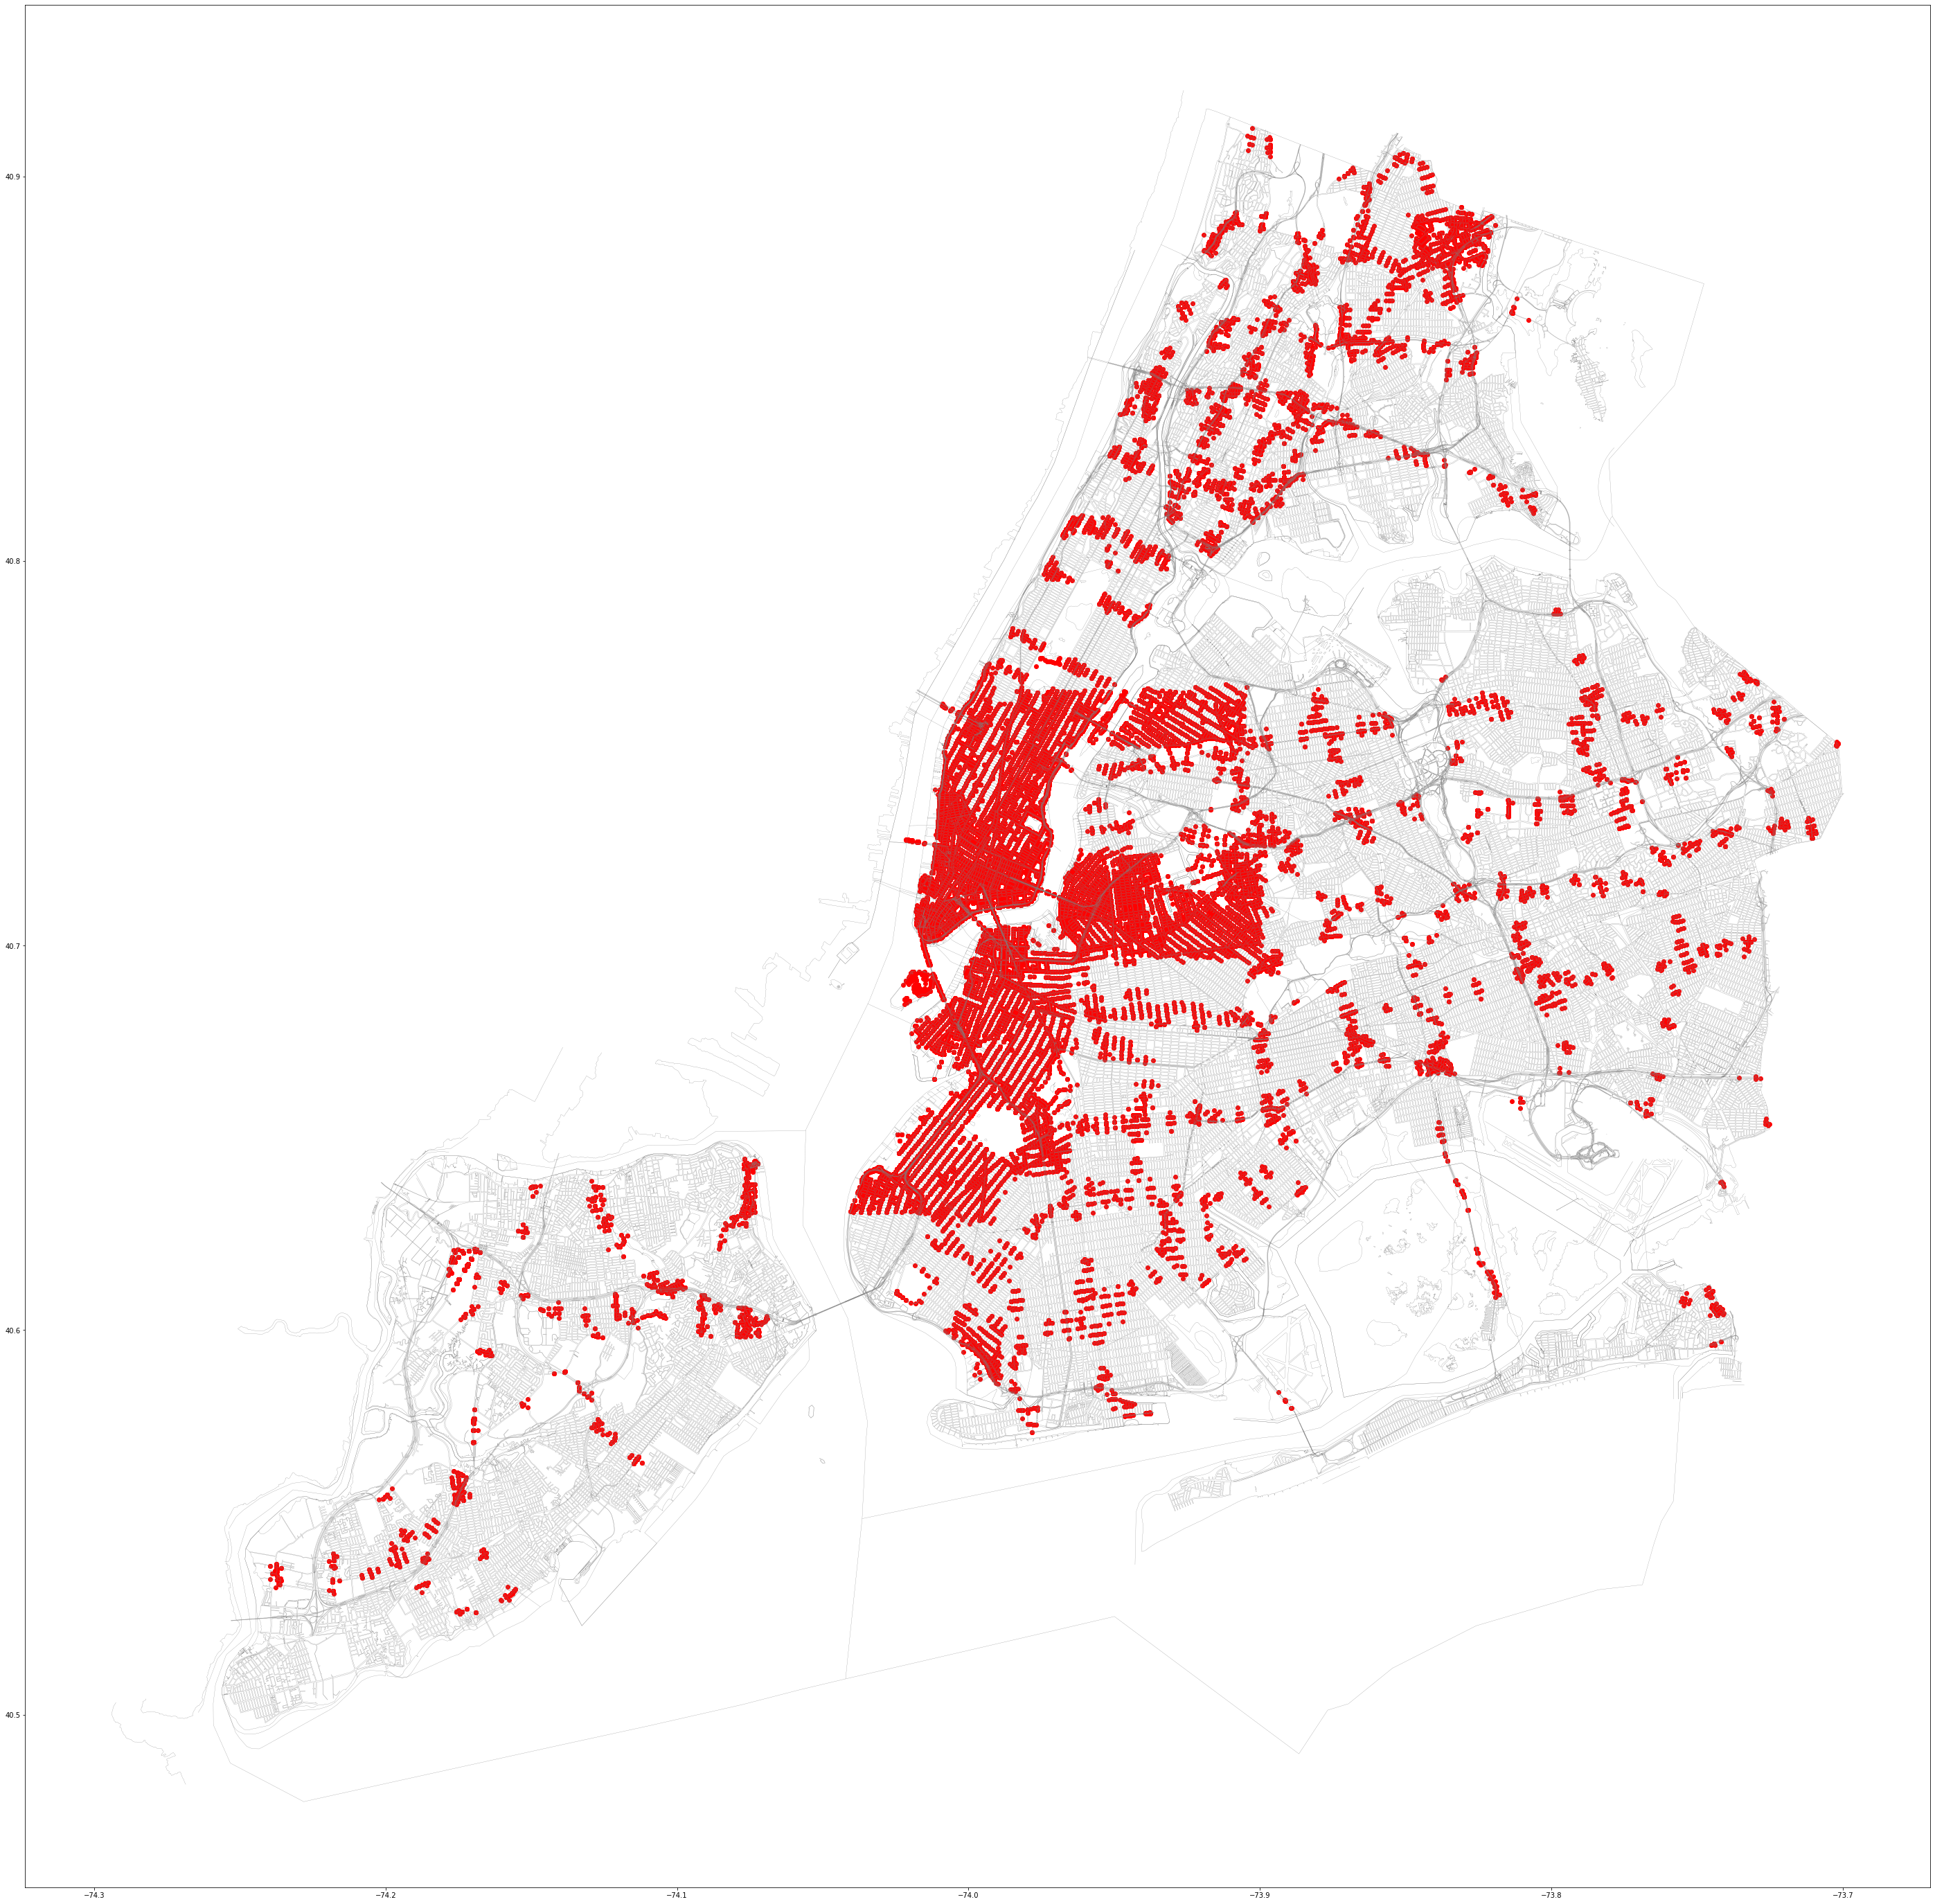

In [150]:
fig, ax = plt.subplots(figsize = (50, 50))
speed_limits = speed_limits.set_crs(4326, allow_override = True)
street.to_crs(speed_limits.crs).plot(ax=ax, figsize = (50, 50), color = 'grey', linewidth = 0.25)
speed_limits.plot(column='postvz_sl',ax=ax, figsize = (50, 50), color = 'red')
fig.show()

## Average Collision Risk with Speed Bumps vs no Speed Bumps